<a href="https://colab.research.google.com/github/robinnewhouse/advent-of-code/blob/main/day_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# part 1

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


# part 1
def print_grid(gridd):
  for row in gridd:
    for col in row:
      print('.' if col == 0 else '#', end=' ')
    print()


class Tile:
  def __init__(self, grid, tile_id):
    self.tile_id = tile_id
    self.grid = np.array(grid)
    self.neighbors = {
      'up': None,
      'down': None,
      'left': None,
      'right': None,
    }
    self.locked = False

  def match(self, tile2):
    grid2 = tile2.grid.copy()
    for flip in [False, True]:
      if flip:
        grid2 = np.fliplr(grid2)
      for i in range(4):
        grid2 = np.rot90(grid2)
        for pos in self.neighbors:
          if self.check(grid2, pos):
            self.neighbors[pos] = tile2.tile_id
            # print(f'{self.tile_id} has neighbor {tile2.tile_id} to the {pos}')
            return grid2
    # print(f'no match between {self.tile_id} and {tile2.tile_id}')
    return None

  # left edge grid[:,0]
  # right edge grid[:,-1]
  # up grid[0,:]
  # down grid[-1,:]
  def check(self, grid2, pos):
    if pos == 'up':  # compare top of self to bottom of grid2
      return all(self.grid[0, :] == grid2[-1, :])
    if pos == 'down':  # compare bottom of self to top of grid2
      return all(self.grid[-1, :] == grid2[0, :])
    if pos == 'left':  # compare left of self to right of grid2
      return all(self.grid[:, 0] == grid2[:, -1])
    if pos == 'right':  # compare right of self to left of grid2
      return all(self.grid[:, -1] == grid2[:, 0])

  def __str__(self):
    return str(self.tile_id)

  def find(self, pos):
    for id2, tile2 in tiles.items():
      if self.tile_id == id2: continue
      grid2 = tile2.grid.copy()
      for flip in [False, True]:
        if flip:
          grid2 = np.fliplr(grid2)
        for i in range(4):
          grid2 = np.rot90(grid2)
          if self.check(grid2, pos):
            self.neighbors[pos] = tile2.tile_id
            return id2, grid2
    return None


# parse
tile_id = -1
tiles = {}
grid = []
rank = 12

for line in input_string.splitlines():
  # for line in test_string.splitlines():
  if line.startswith("Tile"):
    tile_id = int(line.split()[1][:-1])
    continue

  # reset and make a new tile
  if not line:
    tiles[tile_id] = Tile(grid, tile_id)
    grid = []
    continue

  grid.append([0 if char == '.' else 1 for char in line])

# %%
# for second_tile in tiles:
for key1 in tiles.keys():
  tiles[key1].locked = True
  for key2 in tiles.keys():
    if key1 == key2: continue
    result = tiles[key1].match(tiles[key2])
    # set the tile2 grid
    if not result is None:
      if not tiles[key2].locked:
        tiles[key2].grid = result
        tiles[key2].locked = False
# %%

corners = []
for t in tiles:
  if Counter(tiles[t].neighbors.values())[None] == 2:
    corners.append(t)

print('number of tiles:', len(tiles))
print('corner ids', corners)
product = 1
print('solution:', np.product(corners))

number of tiles: 144
corner ids [1693, 1109, 2909, 3371]
solution: 18411576553343


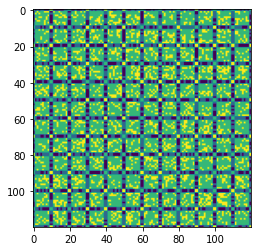

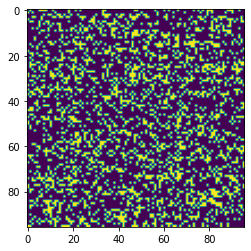

found 43 monsters
solution: 2002.0


2002.0

In [9]:
# part 2
# %%
# I know that it's a 12*12 image since it's got 144 tiles (or at least that's a good guess.
# I'll make a grid of 12*12 and fill that

image = np.zeros([rank, rank], dtype=Tile)
image[0, 0] = tiles[corners[0]]

counter = 0
# pick a corner
t_cur = corners[0]
if rank == 3:  # test example need flipping
  tiles[t_cur].grid = np.flipud(tiles[t_cur].grid)
row = 0
col = 0
while True:
  if col < rank - 1:
    tid_right, tgrid_right = tiles[t_cur].find('right')
    # set this grid in the correct orientation
    tiles[tid_right].grid = tgrid_right.copy()
    # set found tile in next position
    image[col + 1, row] = tiles[tid_right]
    t_cur = tid_right
    col += 1
  elif row < rank - 1:
    col = 0
    t_cur = image[col, row].tile_id
    tid_down, tgrid_down = tiles[t_cur].find('down')
    # set this grid in the correct orientation
    tiles[tid_down].grid = tgrid_down.copy()
    # set found tile in next position
    image[col, row + 1] = tiles[tid_down]
    t_cur = tid_down
    row += 1
  else:
    break

  counter += 1
  if counter > 200:
    # safety break just in case
    break

# the above works!
# %% check that the images are stitched together correctly

stitched_image = np.zeros([(10) * rank] * 2)

for col in range(rank):
  for row in range(rank):
    # remove borders
    image_minus_borders = image[row, col].grid[0:10, 0:10]
    image_minus_borders[0, :] = -1 - image_minus_borders[0, :]
    image_minus_borders[-1, :] = -1 - image_minus_borders[-1, :]
    image_minus_borders[:, 0] = -1 - image_minus_borders[:, 0]
    image_minus_borders[:, -1] = -1 - image_minus_borders[:, -1]
    # place in stitched image
    stitched_image[col * 10:col * 10 + 10, row * 10:row * 10 + 10] = image_minus_borders
plt.imshow(stitched_image);
plt.show()
# %% now stitch them together

stitched_image = np.zeros([(10 - 2) * rank] * 2)

for col in range(rank):
  for row in range(rank):
    # remove borders
    image_minus_borders = image[row, col].grid[1:-1, 1:-1]
    # place in stitched image
    stitched_image[col * 8:col * 8 + 8, row * 8:row * 8 + 8] = image_minus_borders
plt.imshow(stitched_image);
plt.show()

# %% Look for monsters
# Moster:
'''
                  # 
#    ##    ##    ###
 #  #  #  #  #  #   
'''
monster = np.array(
  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
   [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
   [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], ]
)

monster_coordinates = []


# check all flips and rotations
def find_monsters(stitched_image):
  for flip in [False, True]:
    if flip:
      stitched_image = np.fliplr(stitched_image)
    for i in range(4):
      stitched_image = np.rot90(stitched_image)

      for row in range(len(stitched_image) - 3):
        for col in range(len(stitched_image) - 20):
          result = np.logical_or(
            # this line checks if the image elements match the pattern of the monster
            stitched_image[col:col + 20, row:row + 3].T == monster,  # not sure why I need to transpose...
            # this line says that we only care about # tiles, not zero tiles which can be anything
            np.zeros_like(monster) == monster)

          if np.all(result):
            monster_coordinates.append((col, row))
            # print(f'monster found at row={row}, col={col}')
      if len(monster_coordinates) > 0:
        print(f'found {len(monster_coordinates)} monsters')
        print('solution:', np.sum(stitched_image) - len(monster_coordinates) * np.sum(monster))
        return np.sum(stitched_image) - len(monster_coordinates) * np.sum(monster)


find_monsters(stitched_image)


In [3]:
test_string = '''Tile 2311:
..##.#..#.
##..#.....
#...##..#.
####.#...#
##.##.###.
##...#.###
.#.#.#..##
..#....#..
###...#.#.
..###..###

Tile 1951:
#.##...##.
#.####...#
.....#..##
#...######
.##.#....#
.###.#####
###.##.##.
.###....#.
..#.#..#.#
#...##.#..

Tile 1171:
####...##.
#..##.#..#
##.#..#.#.
.###.####.
..###.####
.##....##.
.#...####.
#.##.####.
####..#...
.....##...

Tile 1427:
###.##.#..
.#..#.##..
.#.##.#..#
#.#.#.##.#
....#...##
...##..##.
...#.#####
.#.####.#.
..#..###.#
..##.#..#.

Tile 1489:
##.#.#....
..##...#..
.##..##...
..#...#...
#####...#.
#..#.#.#.#
...#.#.#..
##.#...##.
..##.##.##
###.##.#..

Tile 2473:
#....####.
#..#.##...
#.##..#...
######.#.#
.#...#.#.#
.#########
.###.#..#.
########.#
##...##.#.
..###.#.#.

Tile 2971:
..#.#....#
#...###...
#.#.###...
##.##..#..
.#####..##
.#..####.#
#..#.#..#.
..####.###
..#.#.###.
...#.#.#.#

Tile 2729:
...#.#.#.#
####.#....
..#.#.....
....#..#.#
.##..##.#.
.#.####...
####.#.#..
##.####...
##..#.##..
#.##...##.

Tile 3079:
#.#.#####.
.#..######
..#.......
######....
####.#..#.
.#...#.##.
#.#####.##
..#.###...
..#.......
..#.###...

'''

input_string = '''Tile 3253:
###....#..
.#..##....
##.#.#.#.#
#.#.......
#....#...#
#.##...#..
....#.....
##.##.#..#
.###...##.
##.#...##.

Tile 2843:
...#.#.#..
##.....#.#
..#...#...
#.##.##...
#......###
#..#.#.###
........##
#.....##..
........#.
..##..###.

Tile 2557:
..##..#.#.
#.#......#
...#......
..........
.#....#..#
...#....##
####.....#
.##.##..#.
#..#......
#.#.##.#..

Tile 2543:
...#.#####
...#.....#
#..#.#....
.......#..
......#..#
#......#..
.#...#...#
##.#.#..##
#.#..#.#..
.#..####.#

Tile 3319:
#####..###
.#.#......
#.....#...
.....#...#
.#.#.....#
.....#...#
.##......#
##....#..#
##.#...#.#
.#....#..#

Tile 1607:
.##..#####
#....#..#.
.#..#.....
....#.....
...#.#..##
#..###...#
..#.#.....
..##.##.##
#...#..#.#
###..#.##.

Tile 3329:
#.#######.
#.#...###.
###......#
..........
#..#.#...#
#...##...#
#...##...#
##.#..#.#.
#..##.#...
......#.#.

Tile 2663:
#.#..##.#.
...#.....#
###..#....
..#.....#.
...#....##
.#.....#.#
..........
#..#......
####...#.#
###..#.#.#

Tile 1619:
####.#...#
.#....#..#
.......#.#
#.#....#..
#...#.#...
##........
##....#.#.
.#..###...
#..#...###
###.#.....

Tile 3779:
...#..#..#
.....#..#.
.#.....###
......#.#.
#....#...#
##.#.#..#.
...#......
#.........
..........
##.##.#...

Tile 3821:
.###.#...#
##.......#
..#..#.#..
.....#...#
...###..##
.#......#.
..#...#.#.
#...#....#
#.#..#...#
...###.##.

Tile 2749:
#.##.#..##
...#.##.#.
.....#...#
.......##.
..........
#.###.....
#...##...#
....#..###
#.#.##...#
#..#.#...#

Tile 1153:
##....####
..#..#...#
#..#..#...
.#.#...#..
#...##.##.
.....#....
..#..#..##
##....##..
#....#....
###..###..

Tile 3181:
#.#.##..#.
#...##....
....#.##.#
...#......
###.##....
.##.......
........##
....#..#.#
..##..#..#
#.##....#.

Tile 3491:
.#.....##.
..##..#...
.##...#...
##.....#..
##.....#..
..#...#.#.
#......#.#
#.......#.
#.##..##.#
..#...##..

Tile 1129:
#.##.#.#..
#.#..#.#.#
##........
##.....#.#
.#.......#
#........#
..###....#
.#......#.
.#....#..#
.#.#.#.###

Tile 3967:
##.#.#####
#....#...#
#####...#.
#.#....##.
.#...##.#.
#..#..#...
#..#......
.....#.#.#
........##
#....##..#

Tile 2131:
###.....#.
#..#.##...
#..#.##..#
##.....#..
..#.###.##
#........#
##........
...#.#....
##.....##.
.#....###.

Tile 1657:
###.#.#...
#..#.#...#
..........
..#....##.
.#...#....
##.#..##.#
#..#..##..
......#..#
.....#...#
#####.#.##

Tile 2521:
.##..###..
#.......##
.##......#
#...#.....
###...#..#
.......#.#
#.#..####.
#..#......
#.....#...
#.####....

Tile 1879:
...#####..
#...#.#...
....##.###
.......#..
#.....###.
##......#.
##....##..
#.....#..#
...#.#.#.#
.###.###..

Tile 2999:
.####.#..#
...#.....#
.......##.
#..#....#.
.....#.##.
#.....#..#
....#....#
#........#
...#.####.
.......##.

Tile 1091:
#####.####
##.#...##.
..#......#
....#.#...
#...###.##
#..#.#...#
........##
#.....##.#
##..#.##..
...##.#..#

Tile 3673:
..##.#..##
#....#..##
#.#.#....#
...#.....#
...#......
..#....#..
.#.....#..
..........
#.#.##.#.#
###.##..##

Tile 3727:
..#.#..#.#
##...##...
##........
..#..#.#.#
..##.#....
####.....#
....#....#
#..#.....#
#.#.......
.##.#..#.#

Tile 3089:
#.#.##..#.
.....#...#
##........
.#.#.###.#
.#....#..#
.....##...
.....##..#
..#.......
#.......#.
#...##.#.#

Tile 2819:
....##.#.#
#...#.#..#
......#..#
.#.#.#####
...##..#.#
........##
##..###...
.#.......#
..##...#..
..#.#.#.##

Tile 3023:
..#######.
....##..#.
..#.##....
##...##..#
#.##......
....#.....
##....#..#
.#...##..#
#.#..#....
#.##.###.#

Tile 2789:
###.##....
.##.....#.
.......#.#
....#.....
#..#.#....
.#........
#.........
..#.#....#
#........#
####..#...

Tile 3583:
..#####...
#....#..##
.#.#..#.#.
#..#.#....
#.#..###..
#.#.#.#...
#..#...#.#
#.......#.
#....#..##
....###...

Tile 1997:
..#.###..#
#...##....
###.###..#
####.##..#
####..##.#
##.#..##.#
#..#..###.
#.#.......
.#......##
#..#.#..#.

Tile 3691:
.#...#####
..##.##..#
##.#.#...#
#........#
#.#......#
...#......
#.#......#
..#...#.##
#.####...#
##..#.#...

Tile 1303:
#...#.#...
..#.......
........#.
#...###..#
#....#..#.
..........
#.........
#.##..##.#
#.#.....##
.....##...

Tile 2287:
.#.#.####.
......#...
#.###.....
##..#...#.
#..###...#
##.......#
.....#...#
#.#.....##
..###..#..
..###...#.

Tile 1733:
#######...
##..#....#
.....#....
#.##..##..
#...##.###
#.........
###......#
#.#.#.##.#
...#...#.#
##..#..##.

Tile 1097:
#.###..#..
#....#.#..
...###...#
.##.#.##..
#.#...#..#
...#...#.#
......##..
..#..#....
.....###.#
##....#.#.

Tile 1637:
..###.#...
##........
#..#......
###.##...#
##...##..#
#.........
#.........
#..#..##..
.......#..
.#..##.#..

Tile 3931:
.##.#.#.#.
##........
#...#...##
.##.....##
###....#.#
..##..##.#
#..#.#..##
#.##......
..#.......
...#....##

Tile 3463:
...#.##.#.
.#...#..#.
##....#...
#...#.###.
#.....#.##
#....###..
..####.#..
......##..
.###......
.##..#...#

Tile 2377:
.#.##.##.#
#....#.#.#
.........#
...#...#.#
#.#.......
#......#..
....#...#.
.....##..#
#.##..#..#
##..##.###

Tile 1249:
.##..#####
#........#
.#..#.#...
..#..#..##
##.####.#.
...##.#..#
#..##.....
.......##.
#...#....#
..#.#..#.#

Tile 3257:
#####..###
..........
.#....#..#
#...###...
.#......#.
#..#.#..##
#.....#.##
#..#.....#
.....#....
..#####.##

Tile 1693:
...####.#.
....#..#.#
...#....#.
...#.#.#.#
#....#....
..........
####....##
....##..##
..#...#.##
#.#####.##

Tile 3671:
###..#...#
.......#.#
.......#.#
##......#.
..#.....#.
.##....#.#
.##....#.#
#...#.####
....#..##.
.##...##.#

Tile 2531:
#...#.##..
...#.....#
##........
#.#......#
.#.####...
##........
.#..#.....
#....###.#
#.....#...
....###.#.

Tile 1553:
##.#....#.
.##.#..#..
#...#.##..
.#.#.#..#.
.........#
#....#....
..........
#.#...#..#
##....#...
.###.##...

Tile 1847:
.#.##..##.
......#...
.#.#..#...
...##....#
#.........
.#........
#...#.##.#
#...#..#.#
####.#....
####....#.

Tile 1423:
..###..##.
#.#.#.....
....##...#
#.#.##.###
.#....##.#
#......#.#
.....#...#
#..#.#.#..
##.....###
.....####.

Tile 3533:
##.##.#...
........##
..##..#..#
.#....#..#
..........
#.#......#
...#....#.
....#..#.#
....#..##.
##.#...###

Tile 1033:
##.##.#.#.
#.....####
..#....#.#
###....#.#
#....##.#.
#...#...##
#..#.#....
...#..#..#
##.#..##..
..#.....##

Tile 3413:
#.#.#.#.##
#....#....
...#......
.#..#.#.#.
#...#.....
......#..#
...#.#....
..#.#..#..
##..#.###.
.#####.##.

Tile 1123:
.#....####
#....##...
....#.....
...#..#.##
#....#..##
.##.#...#.
#.#.#.#...
#.#...#..#
##.#.....#
#.##.##.#.

Tile 2551:
###..##.#.
.#..#.##.#
.##.##.#..
.#...#..##
##.......#
.....#....
..#.##...#
.........#
.#.#.#..#.
.#.#.####.

Tile 3677:
.#.#.#.###
.#.#.#..##
#........#
..#.......
#.##.....#
......#..#
##........
#...##....
..##......
.####..###

Tile 3659:
#.#.#.#.##
...##.#...
...#.#.#.#
#..#..#...
###...#...
#.##.#..##
.##...#...
.###......
.#..##....
###.##.#.#

Tile 1103:
####..##.#
##.#.#....
#..#.#....
#...#.#...
##......##
..####.#..
..#..##.#.
.#.#.##...
..##.#.##.
#.#.######

Tile 1361:
#.....####
....##..#.
#...#.....
.........#
#.....#.#.
.....##..#
....####.#
...#....#.
#.....#...
#..##...#.

Tile 3527:
..###.##.#
##.......#
.#.....#.#
#..#.#.#..
#...#.....
#....#....
..#....#.#
.........#
....#....#
.#..######

Tile 1823:
.#####..##
#..#.##...
..##.#...#
#...#....#
....#....#
..#.#.#.##
..#.#....#
#.#....##.
...#.##.##
..#.#..##.

Tile 1559:
#....###.#
.###.#.#.#
#.#.......
#....##.##
#....#.#.#
#.#......#
.#...###..
##...#.##.
.##.#.####
.##..##...

Tile 2161:
#..#.####.
.......#.#
#........#
....#...##
#.#.#...#.
#..###...#
#.........
.#.....#.#
..##.#...#
.#.###.###

Tile 2633:
.#...#.###
..#.#....#
#.......##
#....#....
#.#....#.#
#.##....#.
...###..##
#...#...##
####...#..
.#..###.#.

Tile 2593:
##..#..#.#
#.....###.
#.#.......
##....#.#.
#...##.#.#
#.#..#..##
###...##..
..#......#
#.#.##....
#.#####..#

Tile 2917:
#####.....
#....#...#
..##...#.#
##.#.....#
....##.#.#
#.....#...
.....#.#.#
##...#.##.
..........
......###.

Tile 3881:
..#.....#.
......##..
#....#....
...#.###.#
##....#..#
#....#.#..
#....##...
#.....#...
.....#..##
##....#.##

Tile 1193:
#.###.#.#.
.#.##.###.
.######..#
##.##..#.#
#.....#.#.
..#.##.##.
.#.......#
..#......#
..........
.#.#####.#

Tile 2467:
#..#.#.###
#..#...#.#
...#####.#
#........#
#.#.....#.
.#..#...##
...#..##.#
..#..#...#
#..#......
..###...#.

Tile 2273:
##..####.#
..##.#.##.
..##....##
#.#......#
..#...#...
#.........
#.##....##
.#.#..#..#
#..##.....
#.##....#.

Tile 3191:
###...#.##
.......#..
#.#.#.#...
......#..#
...##...##
....#.##..
##.#..#.##
.......#..
#.....#.#.
...###....

Tile 2423:
..#..##.#.
#.......##
.#....#.##
#.#..##...
###.#####.
#.....#.#.
..##..##..
#.#......#
##........
#..#.#####

Tile 2719:
########..
#.#.#.#.#.
#....#..#.
........#.
.#..##.#..
.....##..#
..##...#.#
##.#......
#........#
..#...#..#

Tile 3467:
..#.#...#.
#....#..##
...#.#..##
.#...##..#
#.#.##...#
.........#
#..#..#..#
#....#..#.
#...##..#.
######..#.

Tile 3461:
#..##.#...
.#...##..#
#..#..#..#
#####.....
...#.###..
....###.#.
##.##.....
#.........
#.###.#...
##...##..#

Tile 1109:
.#.#.#....
...#..###.
......#...
#.........
#.#.......
#.#.#.####
.##..#.#.#
#......#..
#......###
#.###.....

Tile 2953:
##.##.##..
#....#...#
##..##...#
#..#.....#
........#.
#.....###.
##...#####
#.....#...
..#.#..###
...#.##.#.

Tile 2081:
##.#.##..#
#....#..##
###......#
##.......#
.#.#.#....
#.#.#....#
...#..#..#
....##....
..#..#..#.
#.####....

Tile 2141:
###..#.###
#.#..#..##
####....#.
.....#..##
......#.#.
..#.##...#
...##.##..
....#....#
......#..#
..#.####..

Tile 1523:
.#.##...#.
#..#..##..
#.#.......
......#.##
#.#.##.##.
#..##..#..
#.###.....
..##.##...
..#.....#.
.#####.###

Tile 2411:
##.###.###
#.#......#
...##....#
....##....
..#......#
.#.#..#...
##..#...#.
.....#.##.
#.......#.
#...#####.

Tile 1627:
..####.#.#
....#..#..
.##......#
.#..#...#.
##.......#
#.#.......
#.##......
.....#.#.#
#.#......#
####..#...

Tile 1489:
#....#.##.
.......#.#
##.....###
#.#...##.#
...#.....#
######...#
..#...####
...#...#..
.#.#.#.#..
#.##.#.##.

Tile 2371:
#.#.##.##.
...#......
.##.#.....
#.........
#....#...#
.##..#..#.
##.##.###.
.###...#.#
..#.....#.
#...#.###.

Tile 2221:
#..#.#.###
#.##..#.#.
.#.###..#.
#.#..#....
##.#...###
..#.##.#.#
..##.###..
..##.##.#.
....#..#..
#..###.#..

Tile 2861:
#.##.#.###
##..#.#...
#...#....#
##......##
#...#.##..
..##..#..#
.......#..
......#...
#..##..#..
.#..#...#.

Tile 2707:
.##.....##
#...###...
##..####.#
####....##
.#.#......
.##.#....#
.##.....##
##.#.....#
#.#.......
.##..#.#..

Tile 2083:
##...##...
..........
.........#
...#.....#
.....#.#..
...#..#...
#........#
.#.##..#.#
....###..#
##.#......

Tile 2621:
.#..#.#.##
##....##..
...#..#...
##.#.###.#
##.#..#.##
..#.....##
#.##..####
.##.##....
.......#.#
###...#..#

Tile 1993:
#...##.##.
..#.....##
.#........
......#..#
#.##....##
#.#.##...#
...#..#..#
#.#....#.#
.......#..
.###....#.

Tile 1439:
..##......
..#......#
..##..#..#
#...##.#.#
.....#...#
..#...#..#
##.#.####.
#....#....
..#...#..#
..#.#...#.

Tile 3863:
.#..###.##
.........#
##.##...#.
#...#..###
#...#....#
#.....#..#
#.....#..#
.#.##.#..#
##.....###
###..###.#

Tile 3203:
#......##.
##.....#.#
....##...#
....#...##
........##
..#......#
...##....#
#...##.#..
###...#..#
###.##....

Tile 2677:
..#.......
.#..#.....
.#..#..#.#
#.##....##
#...#...#.
#.......##
.#.....###
#.........
........##
....##...#

Tile 1069:
..##..#.#.
###.......
#.#....#..
.#....#.#.
##.....#..
#...#.....
.......#..
#........#
.........#
#..#...##.

Tile 1171:
..##.##.#.
#..#......
#...#....#
....##...#
.##......#
#......#.#
..###...#.
.####.####
.....#.#..
#.#..#...#

Tile 1049:
#.##.##..#
##.#..##..
..#...#...
..#.#.....
#.#......#
.....#.##.
#.#.######
...#.#....
#.....#..#
#...##.#..

Tile 2683:
#..#......
.#.#..####
#.#......#
#.#.......
##.....#.#
#....##...
.#.#.....#
##.......#
#...#.##..
.#####....

Tile 1213:
#.##..###.
...###.#.#
.#....#.##
#.....#...
...##.....
#.#.####.#
#.####..##
###.#.##..
#.#..#.##.
#..#.###..

Tile 1597:
#......###
#.#.##..##
...#####.#
######.#.#
...#.##.#.
........#.
....#....#
##......#.
.###..##.#
##..##...#

Tile 2909:
#.##......
#......##.
...#..#...
###.#..#..
#..#..#...
#....#...#
#......#..
.#........
.#.......#
.####.#...

Tile 1429:
####.#####
.........#
##.#...#.#
#..#..#...
..#...#.##
#..#......
##..#.....
..####...#
#..#..#...
#...#.##..

Tile 3877:
.#..#.#.#.
#..#......
###.##.##.
#.###.....
#.......##
##.#....##
...#......
#...##....
#.##...###
.#.#..###.

Tile 1019:
####.....#
#.#..#..##
#.....#...
.#......##
.........#
......#..#
...#.#.##.
#....#...#
......#..#
.###.#..#.

Tile 3637:
#.....#...
.#..##...#
.###..#...
#.#.#.....
..#....#..
#..#..#...
.#.......#
...#..##.#
#.#....#..
.#.#...##.

Tile 3301:
##.##...#.
.#.#.#....
........#.
#.#..#..#.
.#...###..
#....#.#..
..##......
....#....#
.#...#.###
##.##..###

Tile 2459:
######..##
...#..####
....##...#
...#.#.#..
....#..##.
...#..#...
#...##....
.......#..
#.#.......
#..###.###

Tile 1741:
#..#......
..#.......
.....#..#.
....#.#...
#...##....
#.#......#
##.......#
..#..#...#
.#..#...##
###..#.##.

Tile 3019:
###.#.###.
.##...#.##
#.....##..
#.....#..#
.#.#.#...#
.........#
#..##..##.
##...#...#
#...#.#...
..#.....#.

Tile 1789:
#...#.#.#.
.##..#.#..
...##.#.#.
#...#.#...
..#..#...#
..###....#
...#.#....
.#..#.#..#
.....#....
#...#####.

Tile 2207:
..####.##.
#.......##
.##..#....
..#.#.#..#
#....#####
.....#...#
#####.##..
.##...#..#
.#.#.#....
...####.##

Tile 1783:
..#.......
......#..#
#..#...#..
#.........
.........#
.#.......#
.##....##.
##.##.#...
.#.#....#.
.##.#..##.

Tile 1609:
#.##.#.###
...#...#..
#.#......#
#....#...#
.....#....
..........
...#.....#
###.......
#...#.#..#
#..#.#....

Tile 3011:
##.....#..
..#....#..
#..##.#...
......#...
.#.#.#.#.#
...#.##..#
#.#...#.##
.##.####.#
#.#...####
..##..####

Tile 3517:
#.####.##.
#....##..#
#.##..#..#
.....#...#
#..#......
#....#...#
.........#
#....#.###
......###.
#.#.#..##.

Tile 2969:
#....###.#
##..#...#.
.##..#...#
#.#....###
##.......#
#.#....#.#
.#.#...#.#
#....#.#..
##..#.....
#..#...###

Tile 1487:
#.......#.
......##..
......##..
###..#....
#..#......
#.#......#
##..##..##
#.##.....#
#.........
##.##.#.##

Tile 1201:
..#.#.##.#
..#.....#.
...#......
.....#.#.#
##....#.##
#....#.##.
###....##.
###....#.#
#....#.#.#
#.#..##.#.

Tile 3371:
.#.#...##.
#..#.#..#.
##.#..#..#
.......#..
#........#
.#..#.#...
..........
##........
.#........
...##..#.#

Tile 1367:
#..##.###.
..........
#......###
..#..#..#.
#.####....
...##...##
#.#......#
#.#.#.#..#
..##.####.
##.....#.#

Tile 2699:
##...#...#
#.#.#....#
.#..#..#.#
....###...
#.##.##.##
#..#......
##........
#..#...#.#
..........
##..#####.

Tile 3761:
##.##.#..#
#.#.....#.
..#.##...#
.........#
..#..#.###
.##..#...#
###.##..##
.#....#..#
#...##...#
...##.#.##

Tile 1697:
#...#.##.#
#..#.....#
...###....
#..#..#.#.
#........#
.....#....
#...####.#
##.#......
.#........
##.#...##.

Tile 3221:
#.##...##.
###.#...#.
.#..##.#..
.##.......
#.........
..........
.#####....
##.##.....
.....#..#.
#.##.#.#.#

Tile 1181:
..#.###.##
#.#.##.#.#
...#...#..
#....#.#.#
#..#.##..#
.####..#..
..........
.#.....#..
.......##.
.....#....

Tile 2617:
#..##.....
#.#..#..##
##.##....#
#.........
.....#....
#.#..#.##.
##.#.....#
..#..#.#.#
..#....#.#
..#..####.

Tile 3739:
##.#.#..#.
#.#....#..
.#..#..#.#
##...#.##.
.##.......
#.###.#.#.
#....#..##
..###..#.#
.#....##.#
#.###.#.#.

Tile 1867:
######.#..
...##....#
##.....##.
##.#..#.#.
#..#.#..#.
..#......#
#..#..##..
##...#..#.
.#.#.#.#.#
.##.###.#.

Tile 2777:
..#.##.#.#
..#..#....
...#....##
....####.#
.##.#..###
....##.##.
##....#..#
.....#....
#.....##..
#..##.##.#

Tile 2039:
....#####.
..#..##...
##......##
#..#...#.#
#.#....#.#
..#.....##
...#.#....
#..##.....
#..####.##
#.##.#..#.

Tile 3229:
##...####.
..#.#.#..#
#....#.#..
#.#..##..#
##..#.#...
...##....#
#...##.#.#
#..#.##...
..##...#..
......##..

Tile 1447:
#.###.##.#
#..#..#..#
.....###.#
.......#.#
#..#...##.
#..##..#..
##.##.#...
.###..#.##
.......#..
#..##...#.

Tile 1601:
########.#
##......##
###.##....
#####.....
..........
.........#
..#.#...#.
#...#.....
.###...#..
.##.##..##

Tile 2897:
##.#..#..#
##.......#
.##...#..#
###.#....#
##........
#..#.###..
.#..#.#..#
.#.##..#..
.##......#
.#.##..###

Tile 2549:
.#..#####.
##.......#
#....#...#
.##.###...
##.#.##..#
..#...#..#
...##...##
..#.....#.
.##.....##
##.#.###..

Tile 1667:
###...##.#
#....#...#
.##.#..#.#
.......###
#.......##
..#....#..
.........#
###...#..#
#.#.##.#.#
..#.#..#..

Tile 1327:
###....#.#
..#.#..#.#
##..#..#.#
#..#.##..#
.....#....
##..##.#..
..#......#
.#.#.....#
#.##.###..
.#....#.#.

Tile 3137:
....##.##.
..#.......
#.#.##...#
.#.......#
.##......#
##.#.....#
##.#.....#
###.#.#.#.
#.....#...
..##.#..##

Tile 1759:
#.....#.##
.#...#.#..
..#...#..#
#..#..#..#
#....##..#
..##....#.
#......###
#....#.#.#
#...###..#
###.#.##..

Tile 1747:
#..##....#
.....#...#
..#..#.#.#
.##......#
#.#......#
..#......#
##........
....#.....
#.#......#
##.#..#..#

Tile 1373:
.##....###
....#....#
.........#
.##....#.#
..........
..#.#....#
.##.....#.
.........#
.....#.#.#
#...#.#...

Tile 3313:
...##.#.#.
##..#.....
#...##...#
.#..#.....
...#..##..
#...#.####
#........#
......##.#
###..#..#.
..#.#.##..

Tile 2441:
..#.###.##
#.#..#.###
.##.#.##.#
....#.....
.#.....##.
....##.#.#
..........
..#....##.
.#..####..
#.#..###.#

Tile 3299:
#....#####
##....####
#........#
#..#......
#........#
.###.##...
.##.##.###
..#..#.#..
..###..#..
...#.#..#.

Tile 1061:
.....#...#
#..#...#..
#......##.
.##.....#.
###.....##
.........#
#...#.....
.#..##....
#..#.#..##
###.#....#

Tile 3833:
#.#.###.##
..........
.........#
....#.....
#...#....#
#....#.#..
.....##...
#.........
#.##...#..
##.##.#.#.

'''